In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)  #set default figure size
import numpy as np

import pandas as pd
from ailearn.Swarm import ES

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import SVC,SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA  
import matplotlib.font_manager as fm  

def inverse_scaler(y_scaled, y_true):   
    scaler =MinMaxScaler()              
    scaler.fit(np.reshape(yy.values,(len(yy),1)))      
    y_inverse = scaler.inverse_transform(y_scaled.reshape(-1,1))       
    return y_inverse    

In [76]:
def mean_absolute_percentage_error(y_true, y_pred):  
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)  
    mask = y_true != 0  
    y_true_masked = y_true[mask]  
    y_pred_masked = y_pred[mask]  
    diff = np.abs((y_true_masked - y_pred_masked) / y_true_masked)  
    return np.mean(diff) * 100 

In [77]:
def split(xx, yy):      #定义一个函数用来划分训练集，测试集，验证集
    zscore = StandardScaler()   #用于数据标准化处理的缩放器
    scaler =MinMaxScaler()   #用于数据最小最大缩放处理的缩放器
    xx = zscore.fit_transform(xx)  
    yy = scaler.fit_transform(np.reshape(yy.values,(len(yy),1))) 
    
    x_train, x_test_val, y_train, y_test_val = train_test_split(xx, yy, shuffle=True,test_size=0.3, random_state=1)
    #x_训练集，x_测试验证集，y_训练集，y_测试验证集                    划分前将数据集进行随机打乱，并按照6：4划分，且划分方式统一
    x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, shuffle=True,test_size=0.25, random_state=1)
    #x_测试集，x_验证集，y_测试集，y_验证集                           划分前将数据集进行随机打乱，并按照3：1划分，且划分方式统一
    
    y2 = yy.ravel()     #将yy数组转化为一维数组并存在y2中
    ind_train = [np.argwhere(y2 == y_train[i])[0].item() for i in range(len(y_train)) if y_train[i] in y2]
                                                        #这是一个循环，遍历y_train中的每一个元素，判断y_train中的当前标签y_train[i]是否存在于y2中
                #找到y2中所有等于y_train[i]的元素的索引，返回一个二维数组，然后用[0].item()取得第一行赋值给ind_train生成列表
    ind_test = [np.argwhere(y2 == y_test[i])[0].item() for i in range(len(y_test)) if y_test[i] in y2]
    ind_val = [np.argwhere(y2 == y_val[i])[0].item() for i in range(len(y_val)) if y_val[i] in y2]
   
    y_train = y_train.ravel()       #将y_train数组转化为一维数组
    y_test = y_test.ravel()         #将y_text数组转化为一维数组
    y_val = y_val.ravel()           #将y_val数组转化为一维数组
    
    return x_train, x_test, x_val, y_train, y_test, y_val, xx, yy, np.asarray(ind_train), np.asarray(ind_train), np.asarray(ind_val)
    #返回训练集，测试集，验证集的特征数据，和标签（目标变量）数据，原特数据，原目标变量数据，以及转化为数组的ind_train，ind_train，ind_val

def scatter_plots(model_name,y_pred, y_pred_train, y_pred_test, y_pred_val, yy, y_scaled, y_train, y_test, y_val) :
    R2_score = r2_score(y_scaled,y_pred)
    y_pred2 = inverse_scaler(y_pred,yy)
    y_pred_train2 = inverse_scaler(y_pred_train,yy)
    y_pred_test2 = inverse_scaler(y_pred_test,yy)
    y_pred_val2 = inverse_scaler(y_pred_val,yy)
    plt.scatter(inverse_scaler(y_train,yy),y_pred_train2, label='train')
    plt.scatter(inverse_scaler(y_test,yy),y_pred_test2, label='test')
    plt.scatter(inverse_scaler(y_val,yy),y_pred_val2, label='val')
    plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),c='r', label='1:1')
    labels = df.index
    values = []
    drop_ind = []
    i = 0
    for label in labels:
        if np.round(y_pred2[i],2) not in values :
            values.append(np.round(y_pred2[i],3))
            a = 5
        else:
            a = a + 15
        pos = (a, a)
        i = i+1
    plt.title(model_name)
    plt.legend()
    plt.xlabel('True values')
    plt.ylabel('predictive values')

In [78]:
def scatter_plots(model_name, y_pred_train, y_pred_test, y_pred_val, y_train, y_test, y_val):  
    # 设置图的大小  
    plt.figure(figsize=(6, 6))  
  
    # 在同一个图中绘制所有点的散点图  
    plt.scatter(y_train, y_pred_train, color='blue', label='Train', alpha=0.6)  
    plt.scatter(y_test, y_pred_test, color='green', label='Test', alpha=0.6)  
    plt.scatter(y_val, y_pred_val, color='red', label='Validation', alpha=0.6)  
  
    # 计算完美拟合线的极限值  
    limits = [  
        min(y_train.min(), y_test.min(), y_val.min()),  # x min  
        max(y_train.max(), y_test.max(), y_val.max()),  # x max  
        min(y_pred_train.min(), y_pred_test.min(), y_pred_val.min()),  # y min  
        max(y_pred_train.max(), y_pred_test.max(), y_pred_val.max()),  # y max  
    ]  
      
    # 绘制完美拟合线  
    plt.plot(limits[:2], limits[2:], 'k--', lw=2)  
    
    # 设置图的标题和坐标轴标签  
    plt.title('GA-SVM-C(A)')  
    plt.xlabel('Actual Values')  
    plt.ylabel('Predicted Values')  
  
    # 禁用网格  
    plt.grid(False)  
  
    # 显示图例  
    plt.legend()  
  
    # 显示图形  
    plt.show()

In [79]:
df = pd.read_csv('MP_data_0421_C(A).csv', index_col=None, engine='c') 
print('original datasize:', df.shape)
df.dropna(inplace=True)
print('adjusted datasize:', df.shape)
print('data:')
print(df.head())
np.random.seed(42)

original datasize: (222, 17)
adjusted datasize: (222, 17)
data:
   Time  Deep  Length   HRT     COD    TN  NH4-N    C/N    c(A)  CSC  XLogP3  \
0    90  12.5    45.0  72.0  299.46  26.8  24.07  11.17  100.00   11    -0.1   
1    90  45.0    12.5  72.0  299.46  26.8  24.07  11.17  100.00   11    -0.1   
2    84  10.0    30.0  72.0   66.60   3.6   2.35  18.50    0.18   11     0.2   
3    84  10.0    90.0  72.0   66.60   3.6   2.35  18.50    0.18   11     0.2   
4    84  50.0    30.0  72.0   66.60   3.6   2.35  18.50    0.18   11     0.2   

    WI    RA(P)   RA(F)    RA(B)   RA(A)   RR（A）  
0  885  48.0057  1.8966   9.9499  2.3363  0.9893  
1  885  62.3032  1.6632   6.7403  0.9921  0.9893  
2  943  50.8357  0.9988  10.7969  7.0869  0.7094  
3  943  46.2696  1.4269  11.2249  2.6160  0.7094  
4  943  38.7070  0.6659   6.9918  1.5220  0.7094  


In [80]:
xx= df.iloc[:,0:-1] # predictors
yy=df.iloc[:,-1]# target - kd
x_train, x_test,x_val, y_train, y_test,y_val, x_scaled, y_scaled, ind_train, ind_test,ind_val = split(xx, yy)

print('目标变量是 ', yy.name)
print('特征变量是 ', xx.columns.tolist())
print('样本大小 is ', xx.shape[0], '; 特征变量的数量 is ', xx.shape[1])
print('训练集数据大小 is ', x_train.shape[0], '; 测试集数据大小 is ', x_test.shape[0],'; 验证集数据大小 is ', x_val.shape[0])

目标变量是  RR（A）
特征变量是  ['Time', 'Deep', 'Length', 'HRT', 'COD', 'TN', 'NH4-N', 'C/N', 'c(A)', 'CSC', 'XLogP3', 'WI', 'RA(P)', 'RA(F)', 'RA(B)', 'RA(A)']
样本大小 is  222 ; 特征变量的数量 is  16
训练集数据大小 is  155 ; 测试集数据大小 is  50 ; 验证集数据大小 is  17


In [81]:
gamm=1 / (22 * x_train.var()) # gamma setting
gamm_pusu=gamm
# print(gamm)
print("***Traditional support vector machine***")
print('hyperparameters: C=', 1.0, 'gamma=', gamm, 'epsilon=', 0.1)
SVM_model = SVR(kernel='rbf',C=1.0, gamma=gamm,epsilon=0.1)
SVM_model.fit(x_train, y_train)

y_pred_train=SVM_model.predict(x_train)
y_pred_test=SVM_model.predict(x_test)
y_pred_val=SVM_model.predict(x_val)

print('SVM training     R2:{:.2f}       rmse:{:.3f}        mae:{:.3f}'.format(SVM_model.score(x_train, y_train), mean_squared_error(y_train, y_pred_train), mean_absolute_percentage_error(y_train, y_pred_train)))    
print('SVM test         R2:{:.2f}       rmse:{:.3f}        mae:{:.3f}'.format(SVM_model.score(x_test, y_test), mean_squared_error(y_test, y_pred_test), mean_absolute_percentage_error(y_test, y_pred_test)))    
print('SVM valid        R2:{:.2f}       rmse:{:.3f}        mae:{:.3f}'.format(SVM_model.score(x_val, y_val), mean_squared_error(y_val, y_pred_val), mean_absolute_percentage_error(y_val, y_pred_val)))

***Traditional support vector machine***
hyperparameters: C= 1.0 gamma= 0.04893180656962056 epsilon= 0.1
SVM training     R2:0.93       rmse:0.012        mae:13.331
SVM test         R2:0.87       rmse:0.024        mae:14.839
SVM valid        R2:0.84       rmse:0.033        mae:18.389


In [82]:
# Genetic algorithm - Support vector machine
def SVM_model(C,gamma,epsilon,x_train,x_test,y_train):
    
    model = SVR(kernel='rbf',C=C, gamma=gamma,epsilon=epsilon)
    model.fit(x_train, y_train)
    y_pred_test=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    
    return model, y_pred_train, y_pred_test


def GA_SVM(x_train,x_test,y_train, y_test,basename='prediction'):
    
    gamm=1 / (22 * x_train.var()) # gamma setting
    gamm_pusu=gamm
    EPOCHS=20

    # for ES's evaluation
    def svm_score1(C, gamma,epsilon):
        model = SVR(C=C, gamma=gamma,epsilon=epsilon)
        model.fit(x_train, y_train.ravel())
        # print(model.score(x_test, y_test))
        return model.score(x_test, y_test.ravel())
    
    p = ES(svm_score1,param_len=3,size=10,x_min=[1, gamm_pusu,0.005], x_max=[10, 1,0.15],alpha=0.1) #svm_score
    
    C, gamma,epsilon = p.solve(epoch=EPOCHS,verbose=False)

    print('BEST hyperparameters: C=', C, 'gamma=', gamma,'epsilon=',epsilon)
    GA_model, y_pred_train, y_pred_test = SVM_model(C,gamma,epsilon,x_train,x_test, y_train)
    
    return  GA_model


ga_svm = GA_SVM(x_train,x_test,y_train,y_test)
y_pred_train = ga_svm.predict(x_train)    
y_pred_test = ga_svm.predict(x_test)    
y_pred_val = ga_svm.predict(x_val)  

from sklearn.model_selection import GridSearchCV, cross_val_score
# 交叉验证得分  
scores = cross_val_score(ga_svm, x_train, y_train, cv=5)  
print("Mean cross-validation score: %.2f" % scores.mean())  
print('GA-SVM training\t\tR2:{:.4f}\t\tMSE:{:.6f}\t\tMAE:{:.6f}'.format(ga_svm.score(x_train,y_train), mean_squared_error(y_train, y_pred_train),mean_absolute_error(y_train, y_pred_train)))
print('GA-SVM test  \t\tR2:{:.4f}\t\tMSE:{:.6f}\t\tMAE:{:.6f}'.format(ga_svm.score(x_test,y_test), mean_squared_error(y_test, y_pred_test),mean_absolute_error(y_test, y_pred_test)))
print('GA-SVM valid \t\tR2:{:.4f}\t\tMSE:{:.6f}\t\tMAE:{:.6f}'.format(ga_svm.score(x_val,y_val), mean_squared_error(y_val, y_pred_val),mean_absolute_error(y_val, y_pred_val)))

BEST hyperparameters: C= 7.672984093974131 gamma= 0.04893180656962056 epsilon= 0.005
Mean cross-validation score: 0.80
GA-SVM training		R2:0.9814		MSE:0.003347		MAE:0.019187
GA-SVM test  		R2:0.9308		MSE:0.012480		MAE:0.076979
GA-SVM valid 		R2:0.8820		MSE:0.024131		MAE:0.106183


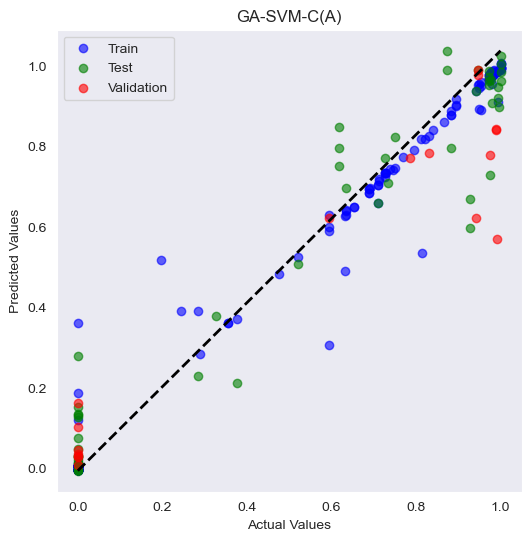

In [83]:
y_pred = ga_svm.predict(x_scaled)
#scatter_plots('GA_SVM',y_pred, y_pred_train, y_pred_test, y_pred_val, yy, y_scaled, y_train, y_test, y_val) 
# 调用scatter_plots函数  
scatter_plots('ga_svm', y_pred_train, y_pred_test, y_pred_val, y_train, y_test, y_val)

In [84]:
import pickle
# save GA_SVM model
model_name = 'ga_svm.pkl' # 模型名称.plk
path =''
with open(path+'ga_svm.pkl','wb') as f:
    pickle.dump(ga_svm, f)

In [85]:
y_train

array([0.    , 0.    , 0.631 , 0.5948, 0.7287, 0.983 , 0.954 , 0.4768,
       0.9536, 1.    , 0.653 , 0.8315, 0.    , 0.    , 0.    , 0.    ,
       0.5948, 0.7094, 0.5201, 0.    , 0.7132, 0.9787, 0.9784, 0.8118,
       0.6903, 0.    , 0.653 , 1.    , 0.    , 0.    , 0.8653, 0.    ,
       0.7276, 0.9844, 0.    , 0.6343, 1.    , 0.    , 0.9489, 0.    ,
       0.895 , 0.7506, 0.    , 0.    , 0.    , 0.6343, 0.7683, 0.    ,
       0.2431, 1.    , 0.7947, 0.    , 0.    , 0.8134, 0.    , 0.9787,
       0.    , 0.9717, 0.882 , 0.3548, 0.    , 1.    , 0.7387, 0.9717,
       0.7094, 0.9417, 0.6893, 0.7276, 0.895 , 0.631 , 0.1957, 0.9784,
       0.    , 0.3765, 0.9844, 1.    , 0.    , 0.    , 0.    , 0.6343,
       0.9472, 0.8215, 0.    , 0.9489, 0.    , 0.    , 0.983 , 0.    ,
       0.6893, 0.7276, 0.955 , 1.    , 0.9717, 0.    , 0.2891, 0.    ,
       0.9784, 0.5948, 0.9894, 0.9489, 0.    , 0.    , 0.285 , 0.9724,
       0.3545, 0.    , 0.9724, 0.7094, 0.7276, 0.7132, 1.    , 0.9909,
      

In [86]:
y_pred_train

array([-0.00468167, -0.00505599,  0.6261672 ,  0.58930493,  0.73385668,
        0.97750169,  0.95861623,  0.48097821,  0.94863175,  0.99532481,
        0.64792554,  0.82651821,  0.00513083, -0.00533553, -0.00501561,
       -0.00504667,  0.62918674,  0.70440533,  0.5249178 ,  0.00492054,
        0.71380144,  0.98371588,  0.97347113,  0.81682622,  0.69501574,
       -0.0046716 ,  0.64798413,  1.00537776, -0.00468225, -0.00540581,
        0.860011  , -0.00237231,  0.73291979,  0.98970305,  0.00500342,
        0.64103534,  0.99533622,  0.00480396,  0.944017  ,  0.00492301,
        0.89984381,  0.74604981,  0.00510382, -0.00229514,  0.00502082,
        0.62912658,  0.77345793,  0.00415623,  0.39097652,  0.99522469,
        0.789512  , -0.00486595,  0.00476665,  0.5344546 ,  0.00527482,
        0.95362106, -0.00509293,  0.96700713,  0.8873199 ,  0.35971967,
        0.00514935,  0.99790749,  0.7438034 ,  0.97719963,  0.65873044,
        0.93628466,  0.68397041,  0.72285737,  0.90192113,  0.49

In [87]:
y_test

array([0.    , 0.    , 0.882 , 0.    , 1.    , 0.6188, 0.    , 1.    ,
       0.    , 0.6343, 1.    , 0.8728, 0.5201, 0.    , 0.7347, 0.    ,
       0.6188, 0.9787, 0.    , 0.    , 0.9417, 0.    , 0.9276, 1.    ,
       0.    , 0.    , 0.3279, 0.6188, 0.    , 0.9729, 0.    , 0.9724,
       0.    , 0.3765, 0.285 , 0.9935, 0.9276, 0.9784, 0.8728, 0.9747,
       0.    , 0.9472, 0.    , 0.9935, 0.9729, 0.7506, 0.7276, 0.7094,
       0.9971, 0.9729])

In [88]:
y_pred_test

array([ 0.27778295,  0.13186405,  0.7955901 ,  0.02718068,  1.00540419,
        0.75074727,  0.02995241,  1.02340779, -0.00547055,  0.69567632,
        0.96268655,  1.0375797 ,  0.50813086,  0.01147626,  0.70803752,
        0.15131617,  0.84893744,  0.90645812,  0.07374876,  0.00295227,
        0.9384316 ,  0.01906664,  0.59557956,  0.98523449,  0.12666521,
        0.13300231,  0.37734715,  0.79468908,  0.01305548,  0.97138823,
       -0.00450599,  0.95331709, -0.00727855,  0.211413  ,  0.22753583,
        0.92093004,  0.66980447,  0.96350531,  0.99078779,  0.72776974,
        0.04578693,  0.98931788,  0.02819985,  0.94622877,  0.98763643,
        0.82291113,  0.76957561,  0.65859929,  0.89853044,  0.96140341])

In [89]:
y_val

array([0.    , 0.974 , 0.9901, 0.8315, 0.    , 0.9472, 0.    , 0.5948,
       0.786 , 0.9417, 0.    , 0.    , 0.    , 0.9909, 0.9893, 0.9472,
       0.    ])

In [90]:
y_pred_val

array([0.16225436, 0.77851056, 0.84137498, 0.78416118, 0.04545963,
       0.98994793, 0.10217423, 0.62231111, 0.7695029 , 0.62020295,
       0.00573438, 0.02739646, 0.03545732, 0.56947728, 0.84379441,
       0.97727515, 0.02981909])